### 1. Create data (ground truth + noise)

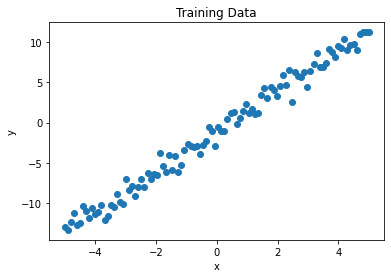

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# reproducibility 
np.random.seed(42)

# true parameters (unknown to the model)
true_m = 2.5
true_c = -1.0

# data 
x = np.linspace(-5,5,100)
noise = np.random.normal(0,1, size = len(x))
y = true_m*x + true_c + noise

# Visualize the data:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

### 2. Initialize parameters (model starts ignorant)

In [4]:
m = 0.0
c = 0.0

### 3. Define model, loss, and gradients
Prediction

In [5]:
def predict(x,m,c):
    return m*x + c

### Mean Squared Error

In [6]:
def mse(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)

### Gradients (core ML logic)

In [12]:
def gradients(x, y_true, y_pred):
    N = len(x)
    dm = (-2 / N) * np.sum(x * (y_true - y_pred))
    dc = (-2 / N) * np.sum(y_true - y_pred)
    return dm, dc


#### Interpretation
* dm: how much slope is responsible for the error
* dc: how much intercept is responsible
* Errors are averaged over all data points

### 4. Gradient descent loop (training)

In [13]:
lr = 0.01
epochs = 100

loss_history = []
m_history = []
c_history = []

for epoch in range(epochs):
    y_pred = predict(x,m,c)
    loss = mse(y,y_pred)
    
    dm, dc = gradients(x,y,y_pred)
    m -= lr*dm
    c -= lr*dc
    
    loss_history.append(loss)
    m_history.append(m)
    c_history.append(c)
    
    if epoch%10 == 0:
        print(f"Epoch {epoch:3d} | loss = {loss:.4f}| m = {m:.3f}| c = {c:.3f}")

Epoch   0 | loss = 55.7569| m = 0.427| c = -0.022
Epoch  10 | loss = 2.9207| m = 2.190| c = -0.220
Epoch  20 | loss = 1.3891| m = 2.464| c = -0.382
Epoch  30 | loss = 1.1782| m = 2.506| c = -0.514
Epoch  40 | loss = 1.0570| m = 2.513| c = -0.622
Epoch  50 | loss = 0.9765| m = 2.514| c = -0.710
Epoch  60 | loss = 0.9228| m = 2.514| c = -0.782
Epoch  70 | loss = 0.8869| m = 2.514| c = -0.841
Epoch  80 | loss = 0.8630| m = 2.514| c = -0.889
Epoch  90 | loss = 0.8470| m = 2.514| c = -0.928


#### What to observe
* Loss decreases steadily
* m and c move toward true values
* Gradients shrink as model improves

### 5. Visualize learning progress
Loss curve

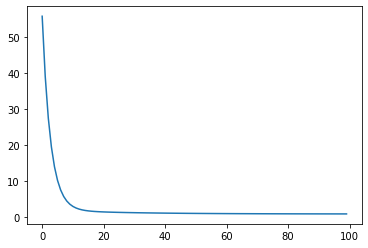

In [14]:
plt.plot(loss_history)

### 6. Visualizing line fitting over time

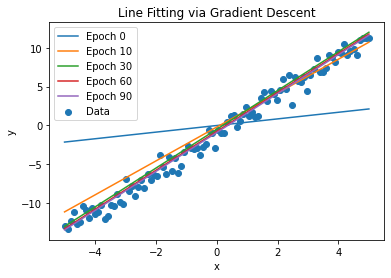

In [16]:
plt.scatter(x,y,label = "Data")
for i in [0,10,30,60,90]:
    y_line = predict(x,m_history[i],c_history[i])
    plt.plot(x,y_line,label=f"Epoch {i}")
    
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Line Fitting via Gradient Descent")
plt.show()

#### Key insight
* Early lines are poor
* Each update slightly rotates and shifts the line
* Training is gradual geometric correction

### 7. Final result vs truth

In [18]:
print("Learned m:", m)
print("Learned c:", c)
print("True m:", true_m)
print("True c:", true_c)


Learned m: 2.5137932470888966
Learned c: -0.9574548824813194
True m: 2.5
True c: -1.0


### 8. Why this builds real ML intuition
* Model = parameters + prediction rule
* Loss = how wrong the model is
* Gradients = responsibility assignment
* Updates = controlled correction
* Loop = learning

This is exactly how neural networks train, just with more parameters and nonlinearities.

#### Practice extensions (high value)
* 1. Increase noise and observe convergence
*  2. Try very large or very small learning rates
*  3. Normalize x and compare speed
* 4. Fit a quadratic model: y = ax² + bx + c
* 5. Add L2 regularization and see effect on slope